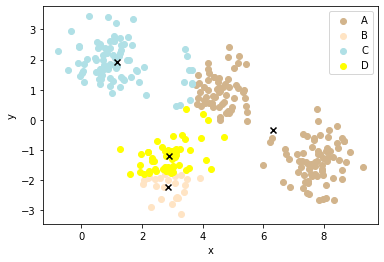

1.0116577472438073


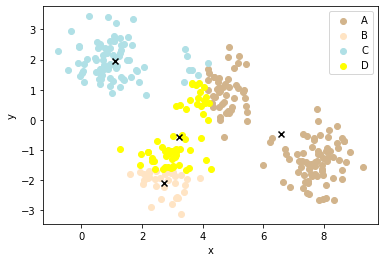

1.6848264141827372


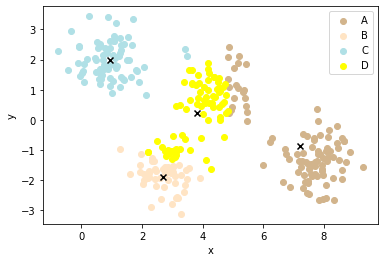

1.4891552453083607


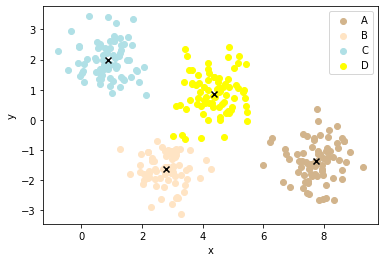

0.21792888381767528


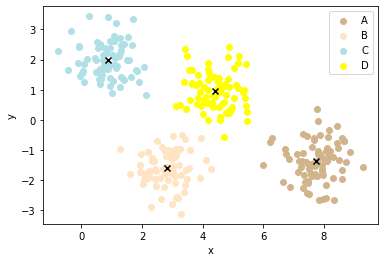

0.0


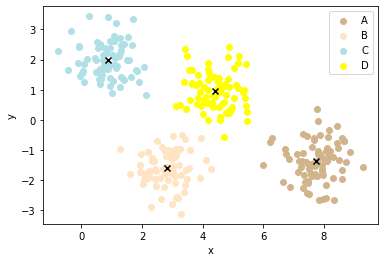

          x       y         1         2         3         4  Cluster
0    2.1364  0.8369  6.036445  2.518892  1.709431  2.285456        3
1    7.4096 -1.4137  0.346460  4.581969  7.370957  3.811704        1
2    5.0996  1.1552  3.665680  3.557066  4.312009  0.710872        4
3    7.8149 -1.0186  0.359886  5.016100  7.567727  3.925048        1
4    1.8925  1.2714  6.430216  3.005981  1.247384  2.546963        3
..      ...     ...       ...       ...       ...       ...      ...
295  1.5798  1.9737  7.022744  3.771602  0.712141  3.018271        3
296  1.3918  2.5183  7.457730  4.347730  0.749438  3.409510        3
297  4.5359  0.4390  3.693019  2.646017  3.979728  0.523926        4
298  7.7911  0.3695  1.743144  5.331241  7.108819  3.421588        1
299  2.7497 -1.7915  5.021439  0.222433  4.217295  3.209541        2

[300 rows x 7 columns]


In [45]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\ASUS\Downloads\cdata.csv")

K=4
a = data[["x","y"]]
first = (a.sample(n=K))

diff = 1
j=0
while(diff!=0):
    XD=a
    i=1
    for index1,row_c in first.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["x"]-row_d["x"])**2
            d2=(row_c["y"]-row_d["y"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        a[i]=ED
        i=i+1

    C=[]
    for index,row in a.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    a["Cluster"]=C
    first_new = a.groupby(["Cluster"]).mean()[["x","y"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (first_new['x'] - first['x']).sum() + (first_new['y'] - first["y"]).sum()
        print(diff.sum())
    first = a.groupby(["Cluster"]).mean()[["x","y"]]
    
    color=['tan','bisque','powderblue',"yellow"]
    for k in range(K):
        label=['A','B','C','D']
        data=a[a["Cluster"]==k+1]
        plt.scatter(data["x"],data["y"],c=color[k],label=label[k])
    plt.legend(labels=['A','B','C','D'],loc='upper right')
    plt.scatter(first["x"],first["y"],marker='x',c='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
print(a)

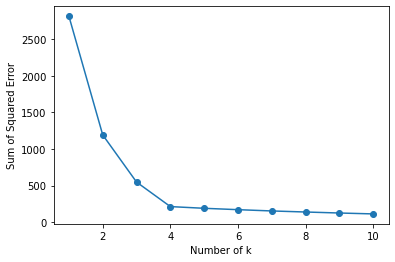

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
data=pd.read_csv("cdata.csv")
data.head()

a = data[['x','y']]
K = range(1,11)
GSSE = []
for k in K:
    SSE = []
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(a)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum(np.sum((data[['x','y']].loc[labels == label,]-centers[label,:])**2)))
    GSSE.append(np.sum(SSE))
    
plt.plot(range(1,11),GSSE,marker='o')
plt.xlabel('Number of k')
plt.ylabel('Sum of Squared Error')
plt.show()

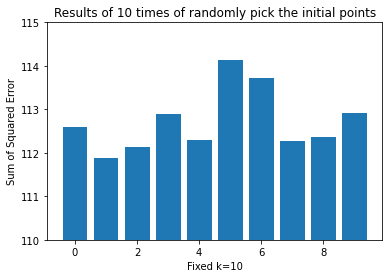

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
data=pd.read_csv("cdata.csv")
data.head()

a = data[['x','y']]
GSSE = []
for i in range(10):
    K =10
    SSE = []
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(a)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum(np.sum((data[['x','y']].loc[labels == label,]-centers[label,:])**2)))
    GSSE.append(np.sum(SSE))
x=range(0,10)
y=GSSE
plt.bar(x,y)
plt.ylim(110,115)
plt.title('Results of 10 times of randomly pick the initial points')
plt.xlabel('Fixed k=10')
plt.ylabel('Sum of Squared Error')
plt.show()